In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv('data/Ames_Housing_Price_Data.csv')

### My Columns

In [4]:
housing = housing[['SalePrice',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'KitchenQual',
'TotRmsAbvGrd',
'Functional',
'Fireplaces',
'FireplaceQu',
'GarageType',
'GarageFinish',
'GarageCars',
'GarageArea',
'GarageQual',
'GarageCond',
'PavedDrive',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch']]

In [5]:
housing.sample(10)

,SalePrice,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
2475,105000,1.0,0.0,1,0,2,1,TA,5,Typ,...,1.0,180.0,Fa,TA,Y,48,0,0,0,0
1144,462000,1.0,0.0,3,1,4,1,Ex,10,Typ,...,3.0,754.0,TA,TA,Y,135,64,0,0,0
1495,248000,0.0,0.0,2,1,4,1,Gd,8,Typ,...,3.0,648.0,TA,TA,Y,0,56,0,0,0
1137,114500,0.0,0.0,1,0,2,1,TA,5,Typ,...,1.0,275.0,TA,TA,Y,0,0,0,0,0
2078,139500,0.0,0.0,2,0,3,1,TA,7,Typ,...,1.0,240.0,TA,TA,Y,335,0,0,0,0
1793,145000,1.0,0.0,1,0,3,1,TA,5,Typ,...,2.0,572.0,TA,TA,Y,264,0,0,0,0
717,185850,1.0,0.0,2,0,2,1,Gd,6,Typ,...,2.0,484.0,TA,TA,Y,192,36,0,0,0
2512,291000,1.0,0.0,2,0,3,1,Ex,8,Typ,...,3.0,711.0,TA,TA,Y,168,120,0,0,0
836,120500,0.0,0.0,1,0,3,1,Gd,5,Typ,...,2.0,660.0,TA,TA,Y,96,0,0,0,0
1914,263400,1.0,0.0,2,1,3,1,Gd,8,Typ,...,2.0,506.0,TA,TA,Y,0,96,0,0,0


### Data Cleanup: fillna

In [14]:
# Filling nominal NA's with 0's (no basement or garage)
housing['GarageQual'].fillna(0, inplace = True)
housing['GarageCond'].fillna(0, inplace = True)
housing['GarageCars'].fillna(0, inplace = True)
housing['GarageArea'].fillna(0, inplace = True)

# Filling categorical NA's with 'None' (no garage)
housing['GarageType'].fillna('None', inplace = True)
housing['GarageFinish'].fillna('None', inplace = True)

In [15]:
housing.isnull().any()

SalePrice        False
BsmtFullBath      True
BsmtHalfBath      True
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType       False
GarageFinish     False
GarageCars       False
GarageArea       False
GarageQual       False
GarageCond       False
PavedDrive       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
dtype: bool

### Data Cleanup: Combine Bathrooms to create 'TotalBath' feature

In [16]:
# Combining bathrooms to single variable and dropping the individual counts
housing['TotalBath'] = housing['BsmtFullBath'] + .5 * housing['BsmtHalfBath'] + housing['FullBath'] + .5* housing['HalfBath']
housing.drop(['BsmtFullBath', 'BsmtHalfBath', 'HalfBath'], axis = 1, inplace = True)

- I kept the 'FullBath' feature because it had a 0.53 correlation with 'SalePrice'

In [17]:
housing.TotalBath

0       2.0
1       3.0
2       1.0
3       1.0
4       3.5
       ... 
2575    1.0
2576    2.0
2577    2.0
2578    3.5
2579    2.5
Name: TotalBath, Length: 2580, dtype: float64

### Data Cleanup: Deck / Porches to binary terms

- Disregard size of deck / porch
- Simplify to binary terms: 1 if it has a deck/porch, 0 if it does not

In [8]:
housing['WoodDeckSF'] = [1 if x > 0 else 0 for x in housing['WoodDeckSF']]
housing['OpenPorchSF'] = [1 if x > 0 else 0 for x in housing['OpenPorchSF']]
housing['EnclosedPorch'] = [1 if x > 0 else 0 for x in housing['EnclosedPorch']]
housing['3SsnPorch'] = [1 if x > 0 else 0 for x in housing['3SsnPorch']]
housing['ScreenPorch'] = [1 if x > 0 else 0 for x in housing['ScreenPorch']]

housing.rename(columns = {'WoodDeckSF': 'WoodDeck', 'OpenPorchSF': 'OpenPorch'}, inplace = True)

### Data Cleanup: Ordinal and Categorical Features

In [11]:
#Ordinal
housing.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
housing.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
housing.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
housing.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

#Categorical
dummies=['Functional','GarageType','GarageFinish']

for d in dummies:
    temp = pd.get_dummies(housing[d], prefix=d, prefix_sep='__')
    temp = temp.drop(d+'__'+str(housing[d].mode()[0]), axis=1)
    #drop the most common one (mode), making it the base case
    housing = pd.concat([housing.drop(d, axis=1),temp], axis=1)
    #merge back with main df

### Multicollinearity in Garages

High correlation in:
- GarageCars | GarageArea
- GarageQual | GarageCond

In [32]:
print(f'GarageCars | GarageArea', housing['GarageCars'].corr(housing['GarageArea']))
print(f'GarageCars | GarageQual', housing['GarageCars'].corr(housing['GarageQual']))
print(f'GarageCars | GarageCond', housing['GarageCars'].corr(housing['GarageCond']))
print(f'GarageArea | GarageQual', housing['GarageArea'].corr(housing['GarageQual']))
print(f'GarageArea | GarageCond', housing['GarageArea'].corr(housing['GarageCond']))
print(f'GarageQual | GarageCond', housing['GarageQual'].corr(housing['GarageCond']))

GarageCars | GarageArea 0.8898279487178717
GarageCars | GarageQual 0.553947524952688
GarageCars | GarageCond 0.5424153436558793
GarageArea | GarageQual 0.545929045147731
GarageArea | GarageCond 0.5308307101908939
GarageQual | GarageCond 0.9409098825951635


### Removing Features

- 3 features left, but should all be dropped.
    - 'BsmtFullBath' - .29 correlation, seems unnecessary
    - 'BsmtHalfBath' - -.03 correlation is too low
    - 'FireplaceQu' - over 1200 NA's - probably not contributing much

In [34]:
housing['BsmtFullBath'].corr(housing['SalePrice'])

0.2910798682384592

In [35]:
housing['BsmtHalfBath'].corr(housing['SalePrice'])

-0.03380161573118478

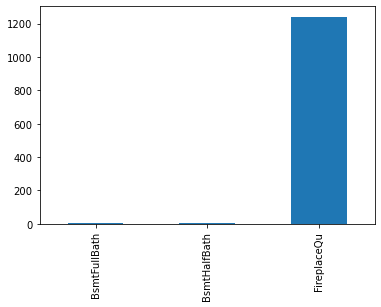

In [33]:
missing = housing.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing.plot.bar()

### Checking Correlations to 'SalePrice'

In [36]:
num_vars = housing.select_dtypes(np.number)

In [37]:
correlation = num_vars.corr()
print(correlation['SalePrice'].sort_values(ascending = False), '\n')

SalePrice              1.000000
KitchenQual            0.655118
GarageCars             0.638424
GarageArea             0.634669
FullBath               0.534982
TotRmsAbvGrd           0.490219
Fireplaces             0.488184
OpenPorch              0.423054
GarageFinish__Fin      0.404281
WoodDeck               0.308870
BsmtFullBath           0.291080
HalfBath               0.285875
GarageQual             0.273221
PavedDrive             0.268327
GarageCond             0.252923
GarageType__BuiltIn    0.184067
GarageFinish__RFn      0.179338
BedroomAbvGr           0.151806
ScreenPorch            0.101078
3SsnPorch              0.028418
GarageType__2Types    -0.028956
Functional__Mod       -0.029420
Functional__Maj1      -0.031250
GarageType__Basment   -0.031406
Functional__Sal       -0.033615
BsmtHalfBath          -0.033802
GarageType__CarPort   -0.053114
Functional__Maj2      -0.055456
Functional__Min2      -0.058913
Functional__Min1      -0.059377
KitchenAbvGr          -0.113977
Enclosed